
# Final Report
* Scott Barnett

## Individual Project - S&P 500 Prediction


Wine Clustering Project## Goals
* Construct a ML model that predicts wine quality 
* Find key drivers of S&P 500
* Deliver a report to the data science team 


## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
import scipy.stats as stats
import seaborn as sns
import sklearn

import wrangle
import explore


## Acquire

* Data acquired from https://finance.yahoo.com/
    * you may need to run pip install yfinance to access the data
    * Your .csv file will contain more recent data that should not affect the overall results
    * However, you can delete rows after 5 June 2023 to match my data set
* Original dataframe contained 23971 rows and 8 columns
* The data was aquired on 5 June 2023
* Each row represents tarde activity for one day
* Each column represents a unique feature of the days trading activity


## Background Information
* The S&P 500 is a stock market index composed of 500 large companies having common stock listed on the New York Stock Exchange (NYSE) or Nasdaq. Founded in 1923, it is now considered one of the best overall indicators of the US stock market.
* There are several investment vehicles offered by various companies that aim to mimic the composition of the S&P 500 and are tradeble under ticker symbols like SPY and SPX
* For this project we will use ^GSPC, which is Yahoo Finance's 'proprietary' ticker for the S&P 500 index. 
    * ^GSPC is a price index and is not tradeable. It only shows the movement of stock prices in the S&P 500 index.

## Prepare

* Drop data prior to 1990
    * Modern electronic trading dramatically chaged access to the markets
        * NASDAQ introduced electronic trading inthe 1980's, the NYSE began using them in the 90's
        * This caused a major change in market behaviors 
        * dropping this data will keep the model from favoring 70 years of data that no longer apply 
    * Drop last row containing null value as that is part of what we are trying to predict 
        * There were no additional null or missing values
    * Create Engineered columns from existing data
        * Created tommorrow column based on the close price for today 
        * Created a target colum that is up(1) or down(0) value 1 indicating a day to buy stock after close with a predicted rise in price the next day
* Outliers were not addressed in this itteration
* Split data into **train**, **validate**, **test**
    


### Data Dictionary

| Feature | Datatype | Key | Definition |
|---|---|---|---|
| Date | object | Unique | Date of trading activity |
| High | float64 | in USD | The highest value reached that day |
| Low | float64 | in USD | The lowest value reached that day |
| Close | float64 | in USD | The value at the time the market opened |
| Open | float64 | in USD | The value at the time the market opened |
| Volume | int64 | count | The total number of shares traded that day |
| Tomorrow | float64 | in USD | The closing price the next day |
| Target | int64 | 1 = Yes  <br>0 = No | Day you should buy because the value is expected to rise the next day |

### Bring in Data for Exploration

In [2]:
# Bring in data .csv 
df = wrangle.get_wine()
# Split data
train, validate, test = wrangle.split_data(df)

train -> (3897, 14), 59.98%
validate -> (1300, 14),20.01%
test -> (1300, 14), 20.01%


### Sneak Peak at the Data


In [3]:
train.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,white
3353,6.4,0.16,0.28,2.2,0.042,0.033,0.093,0.99140,3.31,0.43,11.1,6,white,1
2032,7.2,0.55,0.09,1.5,0.108,0.016,0.151,0.99380,3.07,0.57,9.2,4,white,1
6223,6.4,0.40,0.25,4.2,0.032,0.015,0.091,0.98988,3.26,0.52,13.1,6,white,1


### Summary of Data

In [4]:
train.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,white
count,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000
mean,7.234770,0.338758,0.320719,5.533423,0.056252,0.030800,0.116135,0.994752,3.217865,0.530742,10.479193,5.812933,0.753400
std,1.302097,0.164181,0.146233,4.828980,0.035599,0.018071,0.056967,0.003022,0.161605,0.148456,1.192935,0.867007,0.431087
min,3.800000,0.080000,0.000000,0.600000,0.012000,0.001000,0.007000,0.987110,2.740000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,0.017000,0.078000,0.992400,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.200000,0.047000,0.029000,0.118000,0.994940,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.200000,0.065000,0.042000,0.156000,0.997000,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.610000,0.289000,0.440000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


## Exploration

* All features independently evaluated against wine quality
* alpha =.05 for all statistics ran
* For categorical features T-tests were used


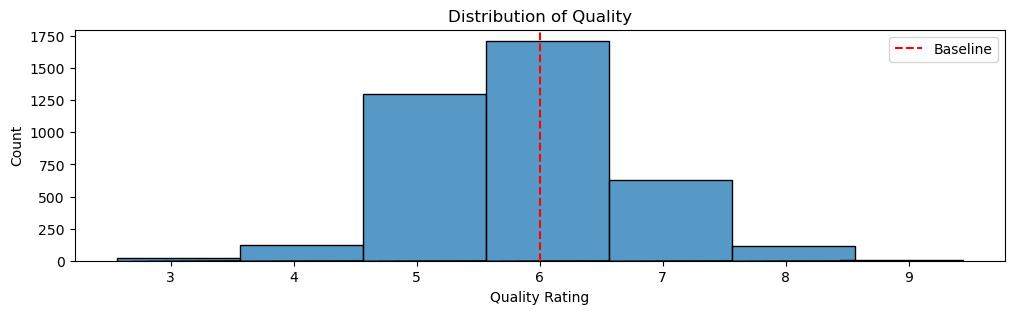

In [5]:
# viualization distribution of target 'quality'
functions.get_distplot(train)

### 1. Is alcohol content predictive of quality?

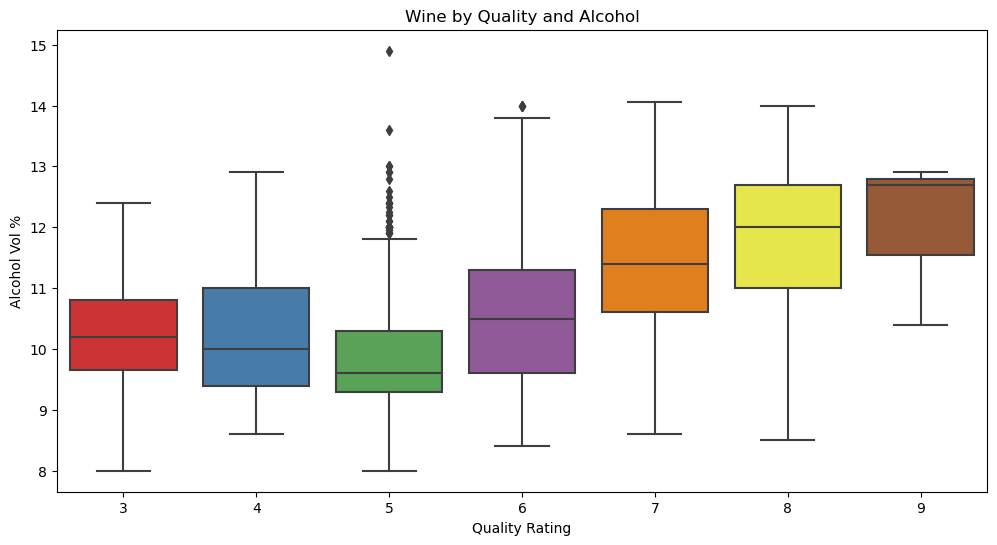

In [6]:
# Get visualizaions
functions.get_alcohol_quality(train)

#### Charting Observations: Alcohol
* As alcohol content increases, the wine quality rating tends to increase as well.
* Conversely, as alcohol content decreases, the wine quality rating tends to decrease.

####  Statistics: Alcohol


##### Hypothisis: Alcohol
$H_0$ : alcohol is independent of quality<br>
$H_a$ : alcohol is not independent of quality

In [7]:
# Running stat test
functions.run_alcohol_ttest(train)

,T-Statistic,P-Value,Decision
0,197.526362,0.0,Reject Null Hypothesis


#### Result
* Based on the result of our test, we can infer that alcohol content impacts wine quality. As alcohol content increases or decreases, wine quality rating increases and decreases respectively. Therefore, we will use this feature in our model.

### 2. Is the volatile acidity level predictive of quality?

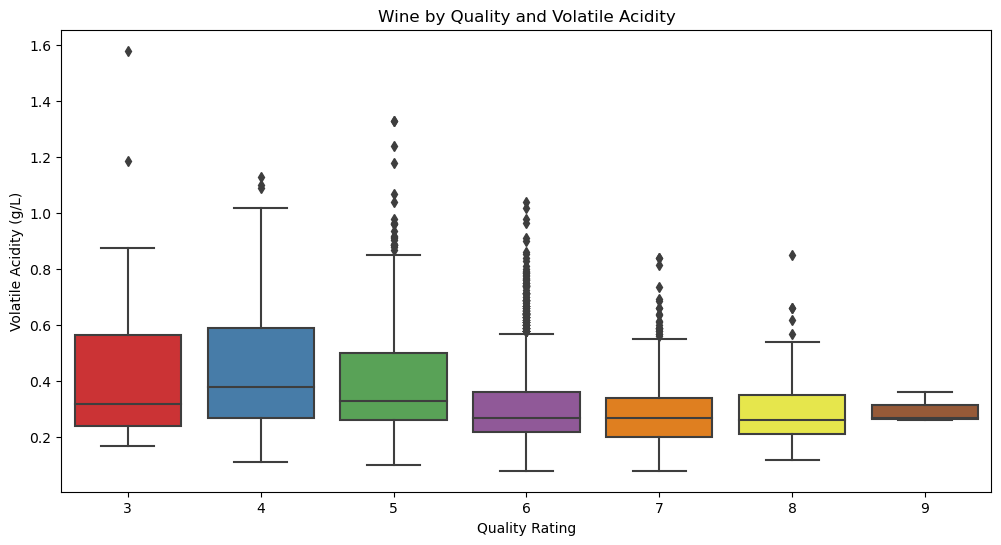

In [8]:
# Get visualizaions
functions.get_va_quality(train)

#### Charting Observations: Volatile Acidity
* Higher fluctuation or spread of volatile acidity results in a lower wine quality grade.
* Conversely, lower fluctuation or spread of volatile acidity results in a higher wine quality grade.

####  Statistics: Volatile Acidity


##### Hypothisis: Volatile Acidity
$H_0$ : Volatile acidity is independent of quality<br>
$H_a$ : Volatile acidity is not independent of quality

In [9]:
# Run stats
functions.run_volatile_acidity_ttest(train)

,T-Statistic,P-Value,Decision
0,-387.267364,0.0,Reject Null Hypothesis


#### Result
* Based on the results of our test, we can infer that volatile acidity impacts wine quality. The more that volatile acidity fluctuates the lower quality grade a wine receives and the less volatile acidity fluctuates the higher quality grade a wine receives. Therefore, we will use this feature in our model.

### 3. Are sulphates predictive of quality?

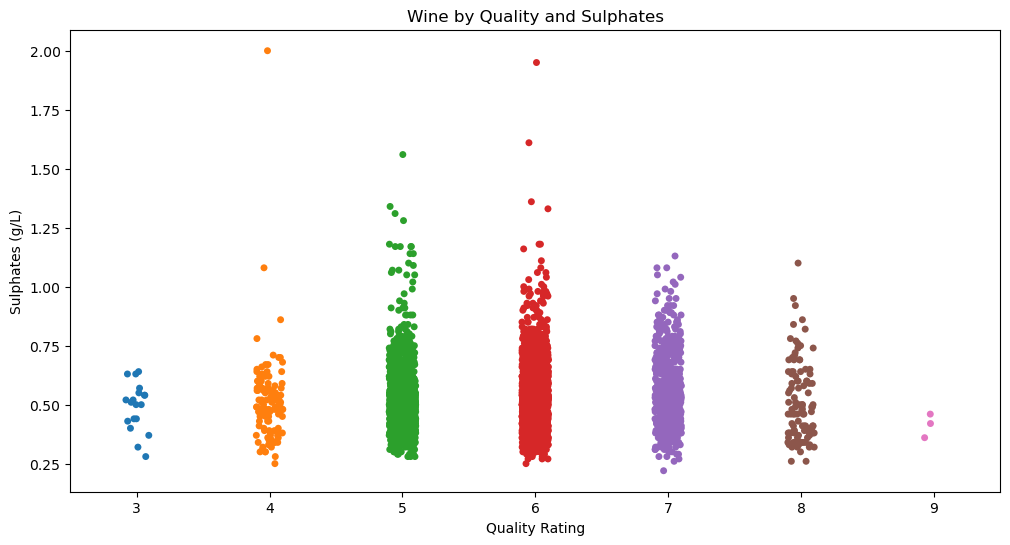

In [10]:
# Get visualizaions
functions.get_sulphate_quality(train)

#### Charting Observations: Sulphates
* There is a normalized relationship between sulphates and quality
* This means that higher sulphate levels are found in average qaulity wines
* It also means that lower sulphate levels result in either low or high quality wines

####  Statistics: Sulphates


##### Hypothisis: Sulphates
$H_0$ : sulphates are independent of quality<br>
$H_a$ : sulphates are not independent of quality

In [11]:
# Running t-stat test
functions.run_sulphates_ttest(train)

,T-Statistic,P-Value,Decision
0,-374.870894,0.0,Reject Null Hypothesis


#### Result
* Based on the observation in the chart and the supporting evidence from the statistics testing we can conclude that Sulphates do have a relationship with quality. Therefore, we will include this feature in our model.

### 4. Is citric acid predictive of quality? 

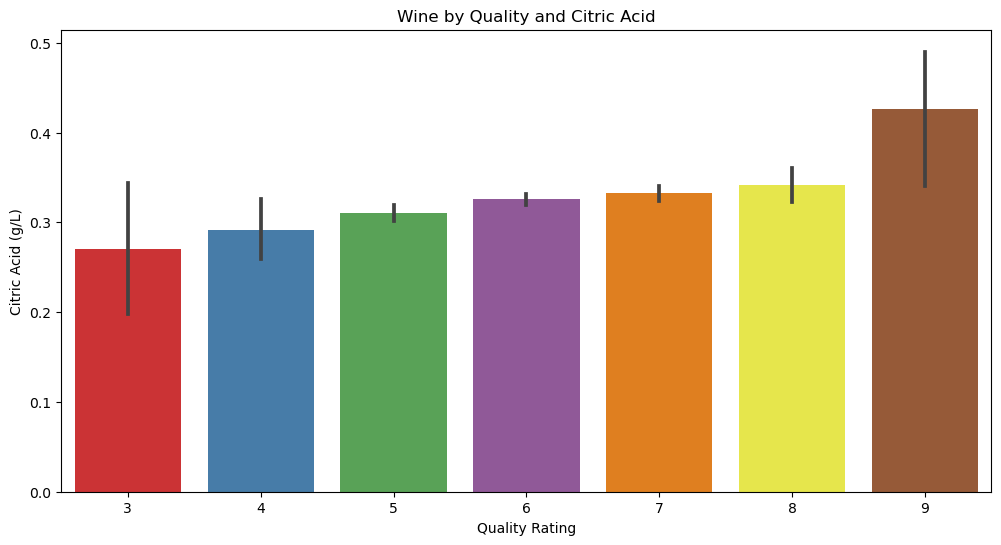

In [12]:
# Get visualizaions
functions.get_ca_quality(train)

#### Chart Observations: Citric Acid
* As citric acid increases, the wine quality rating tends to increase as well.
* Conversely, as citric acid decreases, the wine quality rating tends to decrease.

####  Statistics: Citric Acid


##### Hypothisis: Citric Acid
$H_0$ : citric acid is independent of quality<br>
$H_a$ : sitric acid is not independent of quality

In [13]:
# Running stat test
functions.run_citric_acid_ttest(train)

,T-Statistic,P-Value,Decision
0,-389.941036,0.0,Reject Null Hypothesis


#### Result
* Based on our test result, we can infer that citric acid impacts wine quality rating. As citric acid gradually increases, wine quality rating also increases. Therefore, we will use this feature in our model.

## Clustering

In [14]:
### Before clustering we will scale our data

In [15]:
# Scaling 
X_train_scaled, y_train, X_validate_scaled, y_validate, X_test_scaled, y_test = functions.scale_data(train, validate, test, ['alcohol', 'volatile_acidity','sulphates','citric_acid','free_sulfur_dioxide','ph','fixed_acidity','residual_sugar','white','chlorides','density'])

In [16]:
# scale for clusters
X_train_scaled2 = functions.scale_data_clusters(train)

### Cluster 1: 'fixed_acidity', 'residual_sugar', 'density'

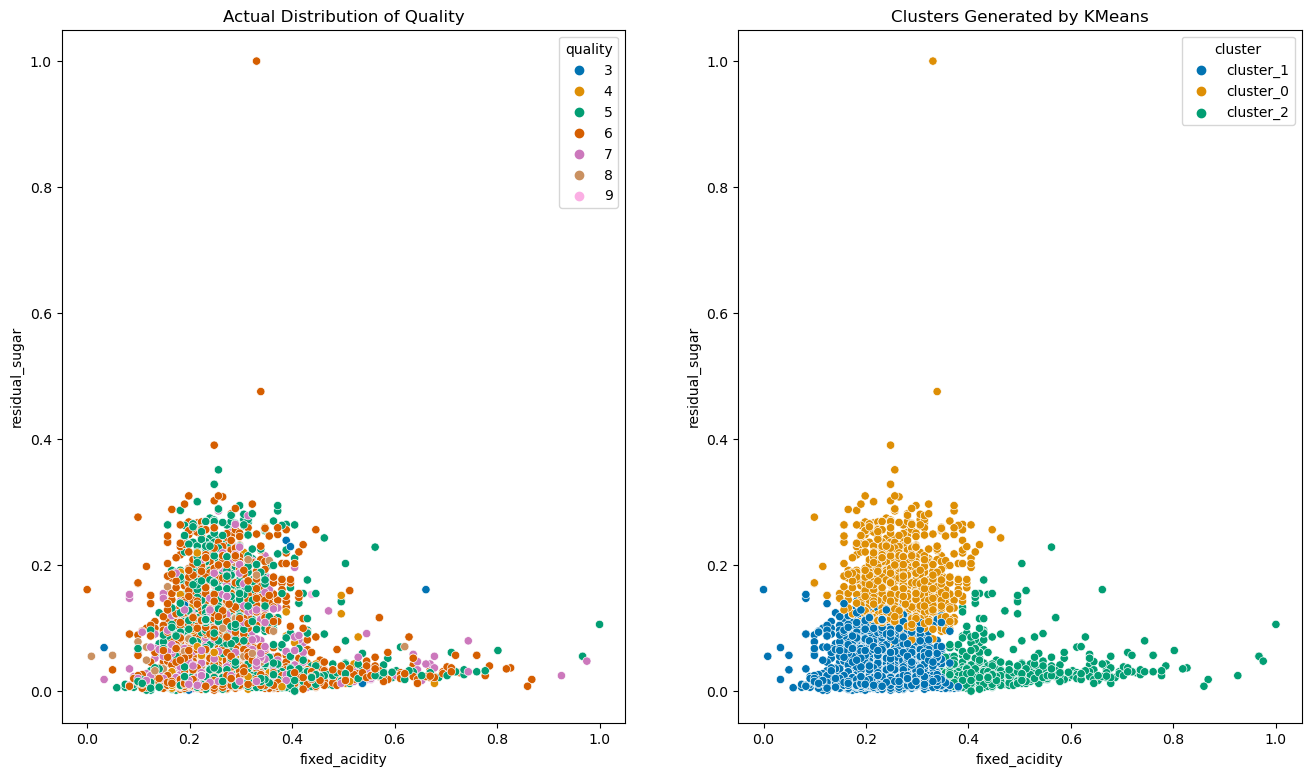

In [17]:
# visual for 'fixed_acidity', 'residual_sugar', 'density' actual vs predicted
new_train1 = functions.find_clusters(X_train_scaled2, 'fixed_acidity', 'residual_sugar', 'density')

#### Charting Observations: 'fixed_acidity', 'residual_sugar', 'density' actual vs predicted
* no clearly observable/useful clusters

### Cluster 2: 'ph', 'density', 'chlorides'

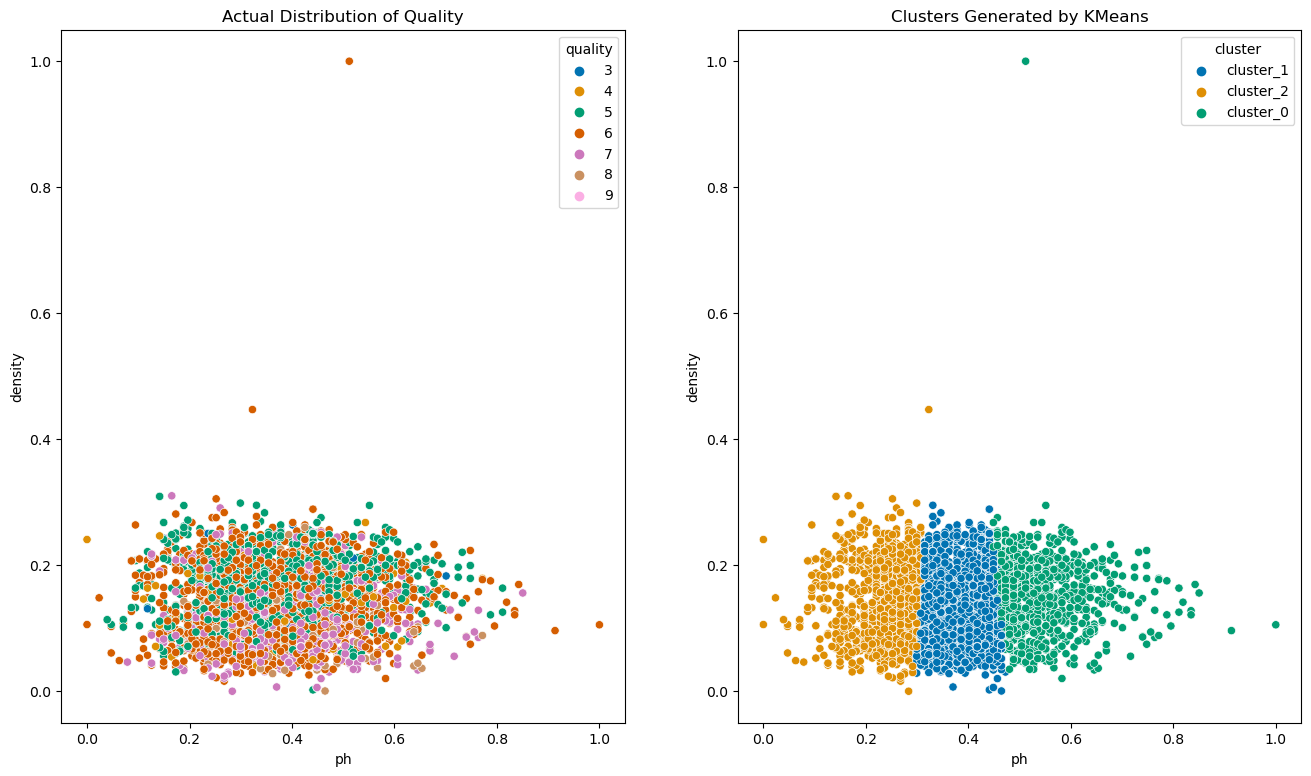

In [18]:
# visual for 'ph', 'density', 'chlorides' actual vs predicted
new_train2 = functions.find_clusters(X_train_scaled2, 'ph', 'density', 'chlorides')

#### Charting Observations: 'ph', 'density', 'chlorides' actual vs predicted
* no clearly observable/useful clusters

### Cluster 3: 'residual_sugar', 'citric_acid', 'white'

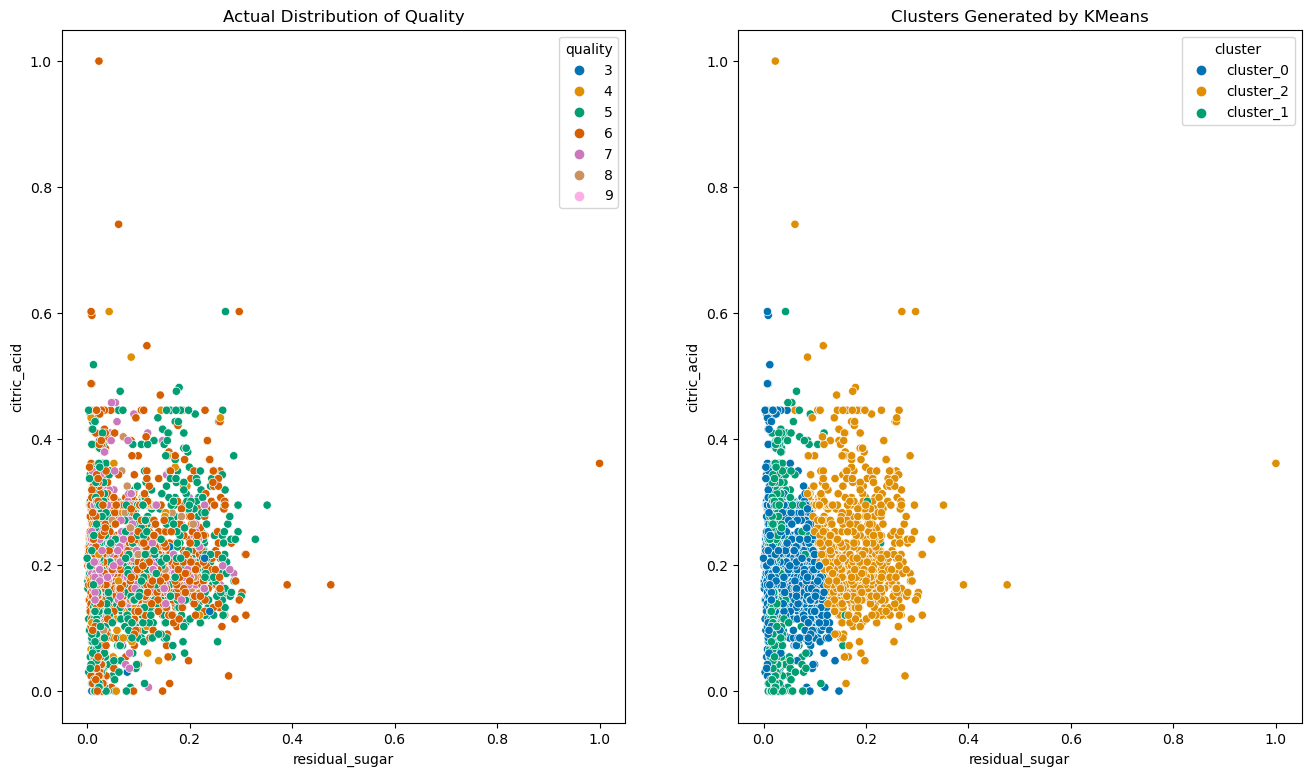

In [19]:
# visual for 'residual_sugar', 'citric_acid', 'white' actual vs predicted
new_train = functions.find_clusters(X_train_scaled2, 'residual_sugar', 'citric_acid', 'white')

#### Charting Observations: 'residual_sugar', 'citric_acid', 'white' actual vs predicted
* potentially useful cluster
* selected for models comparison to non-clustered models

## Exploration Summary
* Alcohol content appears to be the to most corolated feature to quality
    * Wine quality ratings tend to increase as alcohol content increases
* The spread of volatile acidity ranges tends to be greater in lower wine quality grades
* There is a normalized relationship between sulphates and quality
    * Higher sulphate levels are found in average qaulity wines
    * Lower sulphate levels result in either low or high quality wines
* Citric acid levels have a positive linear relationship with quality ratings
* Clustering - there was one cluster found using 'white', ' residual_sugar', 'citric_acid'
    * We will run this in modeling for comparison to non-clutered models
* A combination of these features should create a predictive model for wine quality

### Features we are moving to modeling with
* alcohol: strongest relationship to quality, will have a large impact on our model
* volatile_acidity: strong relationship to quality, will have a large impact on our model
* sulphates: strong relationship to quality, will have a large impact on our model
* citric_acid: strong relationship to quality, will have a large impact on our model
* free_sulfur_dioxide: moderate relationship to quality, will have a moderate impact on our model
* ph: moderate relationship to quality, will have a moderate impact on our model
* white: moderate relationship to quality, will have a moderate impact on our model
* fixed_acidity: weak relationship to quality, but will have a minor impact on our model
* residual_sugar: weak relationship to quality, but will have a minor impact on our model
* chlorides: weak relationship to quality, but will have a minor impact on our model
* density: weak relationship to quality, but will have a minor impact on our model
* **quality: is our target variable**

### Features not moving to modeling 
* total_sulfur_dioxide: this proved to be highly corolated to free_sulfur_dioxide (73%), so one needed to be droped. We chose total_sulfur_dioxide since the level of free_sulfur_dioxide has a greater influence on the wines quality.
* wine_type: duplicated by white

### For the modeling with clusters we will make the following additional changes
* We will create dummies for the cluster
* We will drop the redundant features
    * 'citric_acid'
    * 'residual_sugar'
    * 'white'

## Modeling

### Introduction
* Primary evaluation metric will be **Accuracy**
    * There is no greater value in false positives or false negatives


#### Baseline 

In [20]:
# get baseline 
functions.get_baseline(y_train)

,Baseline,Metric,Score
0,6.0,Accuracy,0.439569


###  Models: without clusters

In [21]:
# running 4 models on non-clustered train and validate sets, retuning accuracy 
functions.create_models(seed=123)
results,X_train_scaled, X_test_scaled,y_test,y_train=functions.get_models(train, validate, test)
results

,model,set,accuracy
0,k_nearest_neighbors,train,0.558378
1,k_nearest_neighbors,validate,0.538462
2,logistic_regression,train,0.545548
3,logistic_regression,validate,0.527692
4,DecisionTreeClassifier,train,0.539902
5,DecisionTreeClassifier,validate,0.524615
6,random_forest,train,0.547344
7,random_forest,validate,0.531538


###  Models: with clusters

In [22]:
# running models on cluster set
functions.cluster_model(new_train,y_train)

,model,set,accuracy
0,k_nearest_neighbors,train,0.549397
1,logistic_regression,train,0.544778
2,DecisionTreeClassifier,train,0.539902
3,random_forest,train,0.545548


### Model Selection
* All Models have very similar results
    * All out performed the baseline accuracy of 0.439569
    * K_nearest_neighbors gave the best results on the train and validate sets
* The model using clustering performed worse than the model without the cluster
* We will use the **K_nearest_neighbors** model **without cluters** for the unseen Test data

### Test Model: KNN wihtout clusters


In [23]:
y_train.sample()

114    5
Name: quality, dtype: int64

In [24]:
# running KNN without clusters on test set
functions.get_test_model(X_train_scaled,y_test,y_train,X_test_scaled)

,Model,Accuracy
0,Knn,0.560769


### Modeling Wrap 
* On the test set, the model returned an Accuracy score of 56.08%
    * Outperforming the baseline 
    * Also outperformed the models training and validation runs
* We can reasonably presume that the model will perform consistantly in the same range
* This model **could** be used in production

## Conclusion

### Summary
* The four features we evaluated closely: alcohol, volatile acidity, citric acid and sulphates; were all closely related to quality scores 
* Only total_sulfur_dioxide needed to be removed from the data set due to it's close relationship to free_sulfur_dioxide
* There was no real opportunity for feature engineering
    * We did some required work for the machine learning models
    * We had virtualy no success finding useful clusters
* Our best model was KNN ran **without** clusters
    * Forcing the cluster for the sake of comparison caused the model to perform worse
### Recommendations
* The model provided can be used to create an estimated quality score
* However, the human sommelier still has a superior nose for this process

### Next Steps
* If provided more time to work on the project we would want to explore taking sommelier classes to see if there is data that could be garnered for the model